In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# load the data

X_train = np.loadtxt("data_wav_compressed/seconds_0.2_overlap_0/data_Train.txt")
y_train = np.loadtxt("labels/seconds_0.2_shuffled/labels_Train.txt")

X_val = np.loadtxt("data_wav_compressed/seconds_0.2_overlap_0/data_Validation.txt")
y_val = np.loadtxt("labels/seconds_0.2_shuffled/labels_Validation.txt")

X_test = np.loadtxt("data_wav_compressed/seconds_0.2_overlap_0/data_Test.txt")
y_test = np.loadtxt("labels/seconds_0.2_shuffled/labels_Test.txt")

In [3]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(489558510,)
(122099670,)
(122747940,)


In [4]:
X_train = X_train.reshape((-1, 4410, 1))
X_val = X_val.reshape((-1, 4410, 1))
X_test = X_test.reshape((-1, 4410, 1))

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(111011, 4410, 1)
(27687, 4410, 1)
(27834, 4410, 1)


(array([55169.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 55842.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

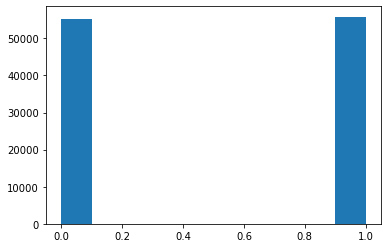

In [5]:
from matplotlib import pyplot as plt

plt.hist(y_train)

In [6]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv1D(128, 80,
                        strides=4,
                        activation="relu",
                        input_shape=(4410, 1)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation="sigmoid"))


model.summary()

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics="accuracy"
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1083, 128)         10368     
_________________________________________________________________
dropout (Dropout)            (None, 1083, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 138624)            0         
_________________________________________________________________
dense (Dense)                (None, 1)                 138625    
Total params: 148,993
Trainable params: 148,993
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=512,
    validation_data=(X_val, y_val),
)

Epoch 1/15
217/217 [==============================] - 122s 564ms/step - loss: 0.3584 - accuracy: 0.8446 - val_loss: 0.3867 - val_accuracy: 0.8650
Epoch 2/15
217/217 [==============================] - 128s 591ms/step - loss: 0.3181 - accuracy: 0.8752 - val_loss: 0.3471 - val_accuracy: 0.8730
Epoch 3/15
217/217 [==============================] - 126s 581ms/step - loss: 0.3038 - accuracy: 0.8800 - val_loss: 0.4126 - val_accuracy: 0.8629
Epoch 4/15
217/217 [==============================] - 117s 539ms/step - loss: 0.2916 - accuracy: 0.8842 - val_loss: 0.2955 - val_accuracy: 0.8793
Epoch 5/15
217/217 [==============================] - 117s 538ms/step - loss: 0.2843 - accuracy: 0.8872 - val_loss: 0.3782 - val_accuracy: 0.8673
Epoch 6/15
217/217 [==============================] - 117s 539ms/step - loss: 0.2780 - accuracy: 0.8890 - val_loss: 0.3131 - val_accuracy: 0.8667
Epoch 7/15
217/217 [==============================] - 117s 537ms/step - loss: 0.2725 - accuracy: 0.8901 - val_loss: 0.4944 -

KeyboardInterrupt: 

In [ ]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()
plt.close()

plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()
plt.close()

In [14]:
model.save('first_model.h5')

In [15]:
test_audio = np.loadtxt("data/for_prediction/Olaf_Schubert/seconds_0.2_overlap_0/Olaf_Schubert_1/data.txt")
test_audio_2 = np.loadtxt("data/for_prediction/Andrew_Ng/seconds_0.2_overlap_0/Andrew_Ng_3/data.txt")

In [16]:
test_audio_3 = np.loadtxt("data/for_prediction/Recording/seconds_0.2_overlap_0/Recording_1/data.txt")

In [17]:
test_audio_3 = test_audio_3.reshape((-1, 128, width, 1))
test_audio_3 = test_audio_3.astype("float32")/255.0

In [18]:
predictions_3 = model.predict(
    test_audio_3)
mask_3 = (predictions_3 > 0.1)
sum(mask_3)/len(mask_3)

array([0.64322917])

In [19]:
test_audio = test_audio.reshape((-1, 128, width, 1))
test_audio_2 = test_audio_2.reshape((-1, 128, width, 1))

In [20]:
test_audio = test_audio.astype("float32")/255.0
test_audio_2 = test_audio.astype("float32")/255.0

In [21]:
predictions = model.predict(
    test_audio)
predictions_2 = model.predict(
    test_audio_2)

In [24]:
mask_2 = (predictions_2 > 0.5)
mask = (predictions > 0.5)

In [29]:
import time
time.sleep(5)
for i, b in enumerate(mask):
    if b:
        print(i*0.2)
    time.sleep(0.2)

17.900000000000002
44.5
62.2
65.0
68.7
129.0
142.70000000000002
146.8
147.1


KeyboardInterrupt: 

In [ ]:
predictions

In [ ]:
mask = (predictions > 0.05)

In [ ]:
plt.plot(mask)[mask]

In [30]:
np.arange(5181)[mask.reshape(-1)]/The 5

SyntaxError: invalid syntax (<ipython-input-30-663f0626662c>, line 1)

In [ ]:
mask.shape

In [ ]:
preds = model.predict(X_test)

In [ ]:
sum((preds > 0.1) & (preds < 0.9))

In [ ]:
test_audio[0].flatten()

In [ ]:
X_test[0]

In [26]:
test_audio.shape

(5181, 128, 9, 1)

In [27]:
X_train.shape

(222024, 128, 9, 1)

In [4]:
! pip install pydub

Defaulting to user installation because normal site-packages is not writeable
  Using cached pydub-0.24.1-py2.py3-none-any.whl (30 kB)
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.


In [7]:
from pydub import AudioSegment
import librosa


sound = AudioSegment.from_mp3("audio_files/class_0/Test/seconds_0.2_overlap_0.1/speech_test_1_slice_0.0.mp3")

sound = sound.set_frame_rate(16000)

sound.export("speech_test_1_slice_0.0.wav", format="wav")
wav_file, sr = librosa.load("speech_test_1_slice_0.0.wav")

print(wav_file)

ModuleNotFoundError: No module named 'pydub'